### Student Information
Name: 蕭靖澂 Ching-Cheng, Hsiao

Student ID: 110033632

GitHub ID: hsiaooo

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [2]:
### Begin Assignment Here

## 1. First: Take home homework

## 2. Second: New dataset

In [3]:
import csv
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh

In [4]:
# -- read datasets -- #
def file(name):
    
    """
    This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', 
    Kotzias et. al,. KDD 2015
    """
    
    f = open('Datasets/{}'.format(name), 'r')
    
    text = []
    score = []
    dataset = []
    
    while True:
        read = f.readline()  # read the dataset line by line
        
        if not read: 
            break
            
        data = read.split('\t',) 
        data_text = data[0]
        text.append(data_text)
        data_score_ = data[1].split('\n',)
        data_score = data_score_[0]
        score.append(data_score)
        dataset.append(name)
        dataset = [i.split('_',)[0] for i in dataset]
#         print(len(dataset))
#         print(data)
#         print(len(data_text))
#         print(data_score) 

    return text, score, dataset


In [5]:
# -- load each dataset -- #
files = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
texts = []
scores = []
datasets = []
for file_ in files:
    text, score, dataset = file(file_)
    texts += text
    scores += score
    datasets += dataset

In [6]:
print(len(texts)) 

3000


In [7]:
scores[:10]
print(len(datasets))

3000


In [8]:
# -- creat pandas.DataFrame -- #
data = {'text': texts, 'score': scores, 'dataset': datasets}
df = pd.DataFrame(data)

In [9]:
df = df.sample(frac=1).reset_index(drop=True)

In [10]:
print(df)

                                                   text score dataset
0     Battery life still not long enough in Motorola...     0  amazon
1                                 Great case and price!     1  amazon
2     I'm not sure what he was trying to do with thi...     0    imdb
3     I just cant explain this movie more than roman...     1    imdb
4     I was sitting in my vehicle, with the cradle o...     0  amazon
...                                                 ...   ...     ...
2995                               I waited and waited.     0    yelp
2996                        useless phone, simply deaf.     0  amazon
2997                  Best tater tots in the southwest.     1    yelp
2998                I keep watching it over and over.       1    imdb
2999  20th Century Fox's ROAD HOUSE 1948) is not onl...     0    imdb

[3000 rows x 3 columns]


### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [11]:
# for _ in data.data[:3]:
#     print(_)

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [12]:
df.iloc[::10, 0:2][0:10]

,text,score
0,Battery life still not long enough in Motorola...,0
10,One of the most disappointing aspects is the l...,0
20,This early film from future goremeister Lucio ...,1
30,This movie is a solid example of a bad plot an...,0
40,"The descriptions said ""yum yum sauce"" and anot...",0
50,"I was very uneasy with how bad this movie was,...",0
60,Lot of holes in the plot: there's nothing abou...,0
70,Sprint - terrible customer service.,0
80,I can take a little bad service but the food s...,0
90,Very easy to use.,1


### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [13]:
df_yelp = df['dataset']=='yelp'
df_= df.loc[df_yelp]
df_[::10][0:5]

,text,score,dataset
5,"The food was great as always, compliments to t...",1,yelp
33,The service was outshining & I definitely reco...,1,yelp
66,I hope this place sticks around.,1,yelp
97,Don't bother coming here.,0,yelp
138,The cow tongue and cheek tacos are amazing.,1,yelp


In [14]:
df.loc[::10, 'text'][0:10]

0     Battery life still not long enough in Motorola...
10    One of the most disappointing aspects is the l...
20    This early film from future goremeister Lucio ...
30    This movie is a solid example of a bad plot an...
40    The descriptions said "yum yum sauce" and anot...
50    I was very uneasy with how bad this movie was,...
60    Lot of holes in the plot: there's nothing abou...
70                  Sprint - terrible customer service.
80    I can take a little bad service but the food s...
90                                    Very easy to use.
Name: text, dtype: object

In [15]:
df.isnull()

,text,score,dataset
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [16]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,dataset
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [17]:
df.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [18]:
dummy_series = pd.Series(["dummy_record", "1"], index=["text", "score"])

In [19]:
dummy_series

text     dummy_record
score               1
dtype: object

In [20]:
result_with_series = df.append(dummy_series, ignore_index=True)

In [21]:
result_with_series

,text,score,dataset
0,Battery life still not long enough in Motorola...,0,amazon
1,Great case and price!,1,amazon
2,I'm not sure what he was trying to do with thi...,0,imdb
3,I just cant explain this movie more than roman...,1,imdb
4,"I was sitting in my vehicle, with the cradle o...",0,amazon
...,...,...,...
2996,"useless phone, simply deaf.",0,amazon
2997,Best tater tots in the southwest.,1,yelp
2998,I keep watching it over and over.,1,imdb
2999,20th Century Fox's ROAD HOUSE 1948) is not onl...,0,imdb


In [22]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,dataset
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [23]:
dummy_dict=[{'text':'dummy_record', 'score':'1'}]

In [24]:
df = df.append(dummy_dict, ignore_index=True)

In [25]:
len(df)

3001

In [26]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,dataset
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [27]:
df.dropna(inplace=True)

In [28]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,dataset
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [29]:
len(df)

3000

In [66]:
sum(df.duplicated('text'))

0

In [31]:
df.duplicated('text')

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [32]:
df.drop_duplicates(keep=False, inplace=True)

In [33]:
len(df)

2966

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to peform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [34]:
df_sample = df.sample(n=1000)

In [35]:
df_sample[0:4]

,text,score,dataset
2315,Their rotating beers on tap is also a highligh...,1,yelp
522,If you want a movie that's not gross but gives...,1,imdb
583,"Overall, this movie was cheap trash.",0,imdb
1746,But it does get better reception and clarity t...,1,amazon


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

imdb      994
yelp      992
amazon    980
Name: dataset, dtype: int64


<AxesSubplot:title={'center':'Library distribution'}>

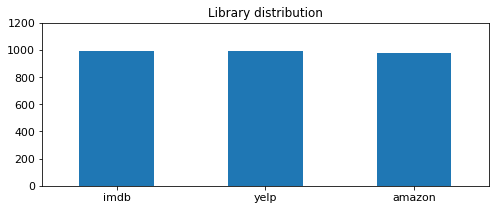

In [37]:
print(df.dataset.value_counts())
df.dataset.value_counts().plot(kind = 'bar',
                                title = 'Library distribution',
                                ylim = [0, 1200],
                                rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

yelp      346
imdb      344
amazon    310
Name: dataset, dtype: int64


<AxesSubplot:title={'center':'Sample data distribution'}>

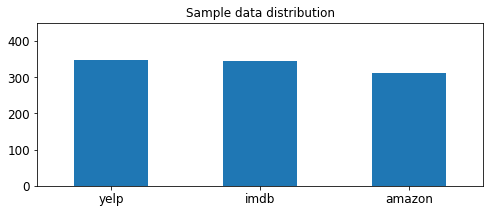

In [38]:
print(df_sample.dataset.value_counts())


# plot barchart for DS_sample
df_sample.dataset.value_counts().plot(kind = 'bar',
                                       title = 'Sample data distribution',
                                       ylim = [0, 450],
                                       rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

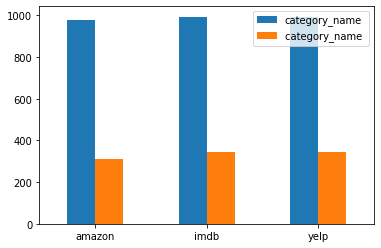

In [39]:
index = ['amazon', 'imdb', 'yelp']
compare_data = pd.DataFrame({'category_name': df.dataset.value_counts(),
                             'category_name ': df_sample.dataset.value_counts()
                            },index=index)
ax = compare_data.plot.bar(rot=0)

### 5.2 Feature Creation
The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `X` table, we would like to create some features from the `text` field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community. 

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First, we are going to obtain the **unigrams** for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'tokens' or 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature to the pandas dataframe. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like **word distribution** or **word frequency**.

Before going into any further coding, we will also introduce a useful text mining library called [NLTK](http://www.nltk.org/). The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which we refer to as words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

```python
import nltk
```

In [40]:
import nltk

In [41]:
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [42]:
df[0:4]['unigrams']

0    [Battery, life, still, not, long, enough, in, ...
1                         [Great, case, and, price, !]
2    [I, 'm, not, sure, what, he, was, trying, to, ...
3    [I, just, cant, explain, this, movie, more, th...
Name: unigrams, dtype: object

In [43]:
df[0:4]

,text,score,dataset,unigrams
0,Battery life still not long enough in Motorola...,0,amazon,"[Battery, life, still, not, long, enough, in, ..."
1,Great case and price!,1,amazon,"[Great, case, and, price, !]"
2,I'm not sure what he was trying to do with thi...,0,imdb,"[I, 'm, not, sure, what, he, was, trying, to, ..."
3,I just cant explain this movie more than roman...,1,imdb,"[I, just, cant, explain, this, movie, more, th..."


In [44]:
list(df[0:1]['unigrams'])

[['Battery',
  'life',
  'still',
  'not',
  'long',
  'enough',
  'in',
  'Motorola',
  'Razor',
  'V3i',
  '.']]

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Initially, it won't have the same shape as the table above, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)

In [46]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [47]:
print(df['text'][0])
analyze(df['text'][0])

Battery life still not long enough in Motorola Razor V3i.


['battery',
 'life',
 'still',
 'not',
 'long',
 'enough',
 'in',
 'motorola',
 'razor',
 'v3i']

In [48]:
df_counts.shape

(2966, 5153)

In [49]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [50]:
df[0:5]

,text,score,dataset,unigrams
0,Battery life still not long enough in Motorola...,0,amazon,"[Battery, life, still, not, long, enough, in, ..."
1,Great case and price!,1,amazon,"[Great, case, and, price, !]"
2,I'm not sure what he was trying to do with thi...,0,imdb,"[I, 'm, not, sure, what, he, was, trying, to, ..."
3,I just cant explain this movie more than roman...,1,imdb,"[I, just, cant, explain, this, movie, more, th..."
4,"I was sitting in my vehicle, with the cradle o...",0,amazon,"[I, was, sitting, in, my, vehicle, ,, with, th..."


In [51]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [52]:
a = np.where(sum(df_counts[0:20]).toarray()>0)[1]
print(a)
print(df.text[16])
print(count_vect.get_feature_names()[a[0]])
df_counts[0:16, a[0]].toarray()

[  19   58   75   77  116  142  179  194  196  216  240  243  245  273
  283  297  305  373  412  423  427  433  458  637  641  683  694  705
  712  763  776  796  835  844  877  894  932  937 1010 1039 1049 1065
 1096 1133 1149 1270 1296 1337 1346 1365 1390 1479 1534 1539 1576 1584
 1585 1589 1599 1605 1635 1638 1677 1707 1711 1741 1821 1826 1828 1850
 1882 1907 1953 1973 1992 1997 2012 2022 2066 2104 2112 2121 2126 2129
 2130 2170 2176 2214 2236 2276 2313 2319 2391 2410 2426 2431 2461 2490
 2492 2516 2525 2544 2581 2629 2637 2667 2683 2685 2699 2709 2758 2930
 2935 2942 2944 2953 2981 2995 3003 3025 3028 3031 3036 3039 3044 3062
 3063 3096 3112 3121 3123 3127 3143 3158 3165 3207 3244 3291 3349 3447
 3468 3513 3549 3566 3608 3610 3618 3624 3727 3756 3812 3898 3899 3918
 3955 4018 4070 4102 4126 4159 4164 4178 4199 4221 4240 4295 4301 4346
 4418 4453 4524 4527 4529 4536 4545 4546 4549 4550 4556 4561 4575 4591
 4607 4627 4640 4711 4743 4854 4873 4966 4968 4978 4991 5013 5015 5019
 5030 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [53]:
# -- count for the specific number of document -- #
numDoc = 20

total_voc_count = sum(df_counts[0:20]).toarray()

In [54]:
total_voc_count.shape

(1, 5153)

In [55]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(total_voc_count)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0 

In [56]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [57]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [58]:
# -- count for the specific number of document -- #
numDoc = 20

b = sum(df_counts[0:20]).toarray()

In [59]:
c = b[0].argsort()[-50:][::-1]

In [60]:
d = [count_vect.get_feature_names()[i] for i in c[:] ]

In [61]:
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names()[0:20]]

In [62]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [63]:
# obtain document index
plot_y = ["doc_" + str(i) for i in list(df.index)[0:20]]

In [64]:
plot_z = df_counts[0:20, 0:20].toarray()

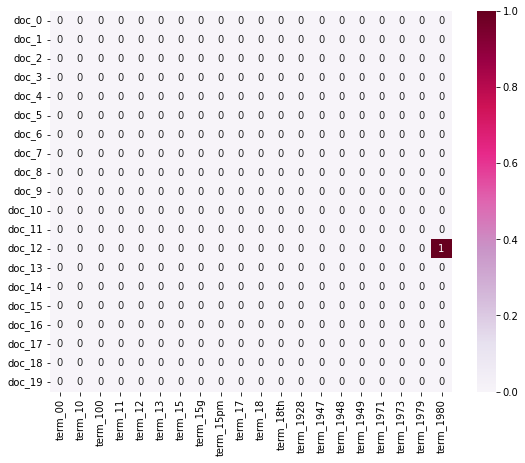

In [65]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)